In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("vegetable_prices.csv")

In [3]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [4]:
df.shape

(7, 2)

Text(0.5, 1.0, 'Vegetable price Analysis')

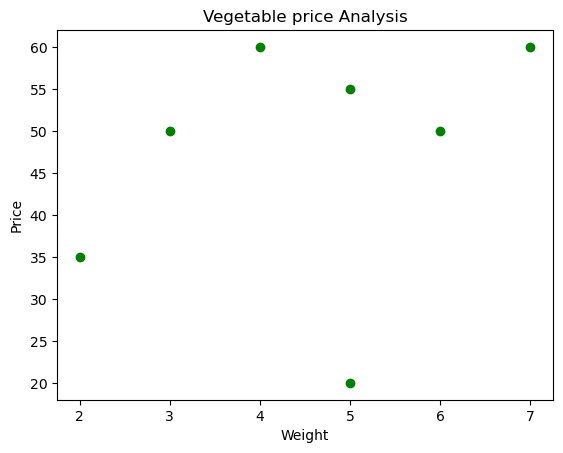

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df[['Weight']], df[['Price']], color='green')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegetable price Analysis')

In [6]:
x=df['Weight']
y=df['Price']

In [7]:
import numpy as np

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculating Slope(M) and Intercept(C)

In [9]:
# Calculate M (slope) and C (intercept)
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x)**2)

M = numerator / denominator
C = mean_y - (M * mean_x)

print("Slope (M):", M) 
print("Intercept (C): ", C)

Slope (M): 2.620967741935484
Intercept (C):  35.16129032258065


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(df[['Weight']] , df[['Price']])

LinearRegression()

In [13]:
reg.coef_

array([[2.62096774]])

In [14]:
reg.intercept_

array([35.16129032])

# Predicting the Price when Vegetable Weight is 6 units

In [15]:
pred_y = (M * 6) + C
pred_y

50.88709677419355

In [16]:
m = reg.coef_
c = reg.intercept_
m*6 + c

array([[50.88709677]])

In [17]:
reg.predict([[6]])

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

# Calculating Predicted prices and Residuals for each data point

In [18]:
# Calculating predicted prices
predicted_prices = (M * x) + C

# Calculating residuals  
residuals = y - predicted_prices


In [19]:
residuals

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [20]:
predicted_prices

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: Weight, dtype: float64

In [21]:
df['Predicted price'] = reg.predict(df[['Weight']])

In [22]:
df

,Weight,Price,Predicted price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [23]:
df['residuals'] = df['Price'] - df['Predicted price']

In [24]:
df

,Weight,Price,Predicted price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


# Calculating MSE(Mean Squared Error) and MAE(Mean Absolute Error)

In [25]:
MSE = np.mean(residuals**2)
MAE = np.mean(np.abs(residuals))

In [26]:
MSE

167.30990783410135

In [27]:
MAE

9.87327188940092

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Price'], df['Predicted price'])
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['Price'], df['Predicted price'])

In [29]:
mse

167.30990783410135

In [30]:
mae

9.87327188940092

# Calculating the mean co-ordinate

In [ ]:
np.mean(x)

In [32]:
np.mean(y)

47.142857142857146

# Finding the best-fit line and verifying that it passes through the mean co-ordinate point

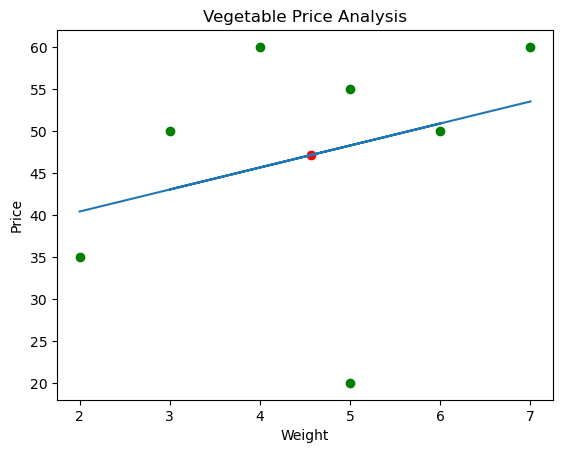

In [33]:
#Best fit line

#plt.plot(x, reg.predict(x))
plt.plot(x, df['Predicted price'])
#import matplotlib.pyplot as plt
plt.scatter(df['Weight'], df['Price'], color='green')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegetable Price Analysis')

#mean coordinate
plt.scatter(np.mean(x), np.mean(y), color='red', marker='o')

# Generating the final dataframe and an excel file for the given dataset

In [34]:
df

,Weight,Price,Predicted price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [35]:
df.to_excel('vegetable_prices.xlsx', index=False)
print("Excel file 'vegetable_prices.xlsx' has been generated.")

Excel file 'vegetable_prices.xlsx' has been generated.
